In [520]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

In [3]:
#Read files
energy_use_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/ele.csv')
out_env_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/site_weather.csv')
in_cooling_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_temp_sp_h.csv')
in_heating_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_temp_sp_h.csv')
zone_temp_interior=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_temp_interior.csv')
zone_temp_exterior=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_temp_exterior.csv')
co2_conc=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_co2.csv')
occupant=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/occ.csv')
wifi_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/wifi.csv')

In [4]:
energy_use_data.head()

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S,Unnamed: 6
0,2018/1/1 1:00,1.2,0.2,7.5,37.400002,19.500000,NaN
1,2018/1/1 1:15,1.3,0.2,6.8,37.500000,19.889999,NaN
2,2018/1/1 1:30,1.1,0.2,7.4,38.000000,19.299999,NaN
3,2018/1/1 1:45,1.2,0.2,7.7,37.200001,18.889999,NaN
4,2018/1/1 2:00,1.1,0.2,7.3,37.400002,24.700001,NaN


For current project we will keep hvac_N and hvac_S as target variable.Based on this assumption, here we will drop mels_S, lig_S, mels_N and Unnamed:6 variable from erergy_use_data

In [5]:
energy_use_target=energy_use_data[['date','hvac_N','hvac_S']]

In [6]:
energy_use_target.head()

,date,hvac_N,hvac_S
0,2018/1/1 1:00,37.400002,19.500000
1,2018/1/1 1:15,37.500000,19.889999
2,2018/1/1 1:30,38.000000,19.299999
3,2018/1/1 1:45,37.200001,18.889999
4,2018/1/1 2:00,37.400002,24.700001


In [7]:
energy_use_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103048 entries, 0 to 103047
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    103048 non-null  object 
 1   hvac_N  101506 non-null  float64
 2   hvac_S  101506 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.4+ MB


In [8]:
out_env_data.head()

,date,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1
0,2018-01-01 00:00:00,11.64,11.51,8.10,79.07,86.70
1,2018-01-01 00:15:00,11.49,11.42,8.14,80.10,45.88
2,2018-01-01 00:30:00,11.59,11.51,8.21,79.92,51.62
3,2018-01-01 00:45:00,11.44,11.41,8.11,80.20,21.43
4,2018-01-01 01:00:00,11.12,11.15,8.04,81.50,6.45


In [9]:
out_env_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105217 entries, 0 to 105216
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          105217 non-null  object 
 1   air_temp_set_1                105217 non-null  float64
 2   air_temp_set_2                105217 non-null  float64
 3   dew_point_temperature_set_1d  105217 non-null  float64
 4   relative_humidity_set_1       105217 non-null  float64
 5   solar_radiation_set_1         105217 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.8+ MB


In [10]:
in_cooling_data.head()

,date,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,zone_019_heating_sp,zone_021_heating_sp,zone_023_heating_sp,zone_024_heating_sp,zone_025_heating_sp,zone_026_heating_sp,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,2018/9/15 10:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/9/15 10:05,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018/9/15 10:10,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/9/15 10:15,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018/9/15 10:20,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
in_cooling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237126 entries, 0 to 237125
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 237126 non-null  object 
 1   zone_016_heating_sp  236626 non-null  float64
 2   zone_017_heating_sp  236626 non-null  float64
 3   zone_018_heating_sp  236626 non-null  float64
 4   zone_019_heating_sp  235911 non-null  float64
 5   zone_021_heating_sp  236704 non-null  float64
 6   zone_023_heating_sp  236325 non-null  float64
 7   zone_024_heating_sp  236256 non-null  float64
 8   zone_025_heating_sp  236253 non-null  float64
 9   zone_026_heating_sp  236658 non-null  float64
 10  zone_027_heating_sp  236155 non-null  float64
 11  zone_030_heating_sp  236183 non-null  float64
 12  zone_032_heating_sp  235793 non-null  float64
 13  zone_035_heating_sp  236693 non-null  float64
 14  zone_036_heating_sp  236629 non-null  float64
 15  zone_037_heating_

In [12]:
in_heating_data.head()

,date,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,zone_019_heating_sp,zone_021_heating_sp,zone_023_heating_sp,zone_024_heating_sp,zone_025_heating_sp,zone_026_heating_sp,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,2018/9/15 10:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/9/15 10:05,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018/9/15 10:10,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/9/15 10:15,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018/9/15 10:20,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
in_heating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237126 entries, 0 to 237125
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 237126 non-null  object 
 1   zone_016_heating_sp  236626 non-null  float64
 2   zone_017_heating_sp  236626 non-null  float64
 3   zone_018_heating_sp  236626 non-null  float64
 4   zone_019_heating_sp  235911 non-null  float64
 5   zone_021_heating_sp  236704 non-null  float64
 6   zone_023_heating_sp  236325 non-null  float64
 7   zone_024_heating_sp  236256 non-null  float64
 8   zone_025_heating_sp  236253 non-null  float64
 9   zone_026_heating_sp  236658 non-null  float64
 10  zone_027_heating_sp  236155 non-null  float64
 11  zone_030_heating_sp  236183 non-null  float64
 12  zone_032_heating_sp  235793 non-null  float64
 13  zone_035_heating_sp  236693 non-null  float64
 14  zone_036_heating_sp  236629 non-null  float64
 15  zone_037_heating_

In [14]:
zone_temp_interior.head()

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,cerc_templogger_3,cerc_templogger_4,cerc_templogger_5,cerc_templogger_6,cerc_templogger_7,cerc_templogger_8,cerc_templogger_9
0,2018-02-22 00:30:00,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,24.062,23.500,23.125,23.562,22.312,22.375,22.625
1,2018-02-22 00:40:00,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,24.000,23.562,22.875,23.750,22.500,22.500,22.687
2,2018-02-22 00:50:00,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,24.250,23.500,23.000,23.625,22.375,22.500,22.687
3,2018-02-22 01:00:00,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,24.187,23.500,23.062,24.000,22.437,22.375,22.875
4,2018-02-22 01:10:00,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,24.187,23.500,23.125,24.062,22.437,22.687,22.875


In [15]:
zone_temp_exterior.head()

,date,zone_016_temp,zone_017_temp,zone_018_temp,zone_019_temp,zone_021_temp,zone_022_temp,zone_023_temp,zone_024_temp,zone_025_temp,...,zone_063_temp,zone_064_temp,zone_065_temp,zone_066_temp,zone_067_temp,zone_068_temp,zone_069_temp,zone_070_temp,zone_071_temp,zone_072_temp
0,2018-01-01 00:00:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.7,69.8,70.0,71.0
1,2018-01-01 00:01:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.7,69.8,70.0,71.0
2,2018-01-01 00:02:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.7,69.8,70.0,71.0
3,2018-01-01 00:03:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.6,69.8,70.0,71.0
4,2018-01-01 00:04:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.6,69.8,70.0,71.0


In [16]:
co2_conc.head()

,date,zone_022_co2,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2019/8/19 01:33,410.0,416.0,428.0,410.0,397.0,423.0,415.0,405.0,415.0,419.0,408.0
1,2019/8/19 01:34,410.0,418.0,421.0,411.0,406.0,420.0,408.0,405.0,417.0,412.0,412.0
2,2019/8/19 01:35,408.0,429.0,424.0,418.0,409.0,424.0,431.0,414.0,415.0,410.0,416.0
3,2019/8/19 01:36,413.0,414.0,426.0,416.0,407.0,418.0,436.0,414.0,423.0,409.0,417.0
4,2019/8/19 01:37,418.0,404.0,437.0,407.0,412.0,416.0,424.0,409.0,419.0,410.0,408.0


In [17]:
occupant.head()

,date,occ_third_south,occ_fourth_south
0,2018-05-22 07:00:00,0.0,0.0
1,2018-05-22 07:01:00,0.0,1.0
2,2018-05-22 07:02:00,0.0,0.0
3,2018-05-22 07:03:00,0.0,1.0
4,2018-05-22 07:04:00,0.0,0.0


In [18]:
wifi_data.head()

,date,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south
0,2018/5/22 00:00,NaN,NaN,38.0,26.0
1,2018/5/22 00:10,NaN,NaN,37.0,26.0
2,2018/5/22 00:20,NaN,NaN,37.0,28.0
3,2018/5/22 00:30,NaN,NaN,36.0,27.0
4,2018/5/22 00:40,NaN,NaN,36.0,28.0


## File Pre-processing and Merging

#### Changing Date Format for all input files into '%Y-%m-%d %H:%M:%S'

In [19]:
energy_use_target['date'] = pd.to_datetime(energy_use_target['date'],format='%Y/%m/%d %H:%M')
energy_use_target['date'] = pd.to_datetime(energy_use_target['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_5048\108079657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_use_target['date'] = pd.to_datetime(energy_use_target['date'],format='%Y/%m/%d %H:%M')
C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_5048\108079657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_use_target['date'] = pd.to_datetime(energy_use_target['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))


In [20]:
energy_use_target.date

0        2018-01-01 01:00:00
1        2018-01-01 01:15:00
2        2018-01-01 01:30:00
3        2018-01-01 01:45:00
4        2018-01-01 02:00:00
                 ...        
103043   2020-12-31 23:00:00
103044   2020-12-31 23:15:00
103045   2020-12-31 23:30:00
103046   2020-12-31 23:45:00
103047   2021-01-01 00:00:00
Name: date, Length: 103048, dtype: datetime64[ns]

In [21]:
in_cooling_data['date'] = pd.to_datetime(in_cooling_data['date'],format='%Y/%m/%d %H:%M')
in_cooling_data['date'] = pd.to_datetime(in_cooling_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [22]:

in_heating_data['date'] = pd.to_datetime(in_heating_data['date'],format='%Y/%m/%d %H:%M')
in_heating_data['date'] = pd.to_datetime(in_heating_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))


In [23]:
co2_conc['date'] = pd.to_datetime(co2_conc['date'],format='%Y/%m/%d %H:%M')
co2_conc['date'] = pd.to_datetime(co2_conc['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [24]:

wifi_data['date'] = pd.to_datetime(wifi_data['date'],format='%Y/%m/%d %H:%M')
wifi_data['date'] = pd.to_datetime(wifi_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [25]:
##Converting all date columns into date formatted type
out_env_data['date'] = pd.to_datetime(out_env_data['date'],format='%Y-%m-%d %H:%M:%S')
zone_temp_interior['date'] = pd.to_datetime(zone_temp_interior['date'],format='%Y-%m-%d %H:%M:%S')
zone_temp_exterior['date'] = pd.to_datetime(zone_temp_exterior['date'],format='%Y-%m-%d %H:%M:%S')
occupant['date'] = pd.to_datetime(occupant['date'],format='%Y-%m-%d %H:%M:%S')


In [26]:
def change_dateformat(dataframe,col):
    dataframe[col]=pd.to_datetime(dataframe[col],format=='%Y/%m/%d %H:%M')
    dataframe[col]=dataframe[col].dt.strftime('%Y-%m-%d %H:%M:%S')
    return dataframe

#### Processing of in_cooling_data file and in_heating_data file

Both in_cooling_data and in_heating_data files have few unnamed fields with all NAN values. We will removed them for processing

In [27]:
in_cooling_data.drop(columns=['Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45',
                            'Unnamed: 46',
                            'Unnamed: 47', 
                            'Unnamed: 48',
                            'Unnamed: 49',
                            'Unnamed: 50',
                            'Unnamed: 51'],inplace=True)

In [28]:
in_heating_data.drop(columns=['Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45',
                            'Unnamed: 46',
                            'Unnamed: 47', 
                            'Unnamed: 48',
                            'Unnamed: 49',
                            'Unnamed: 50',
                            'Unnamed: 51'],inplace=True)

In [29]:
in_heating_data.head()

,date,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,zone_019_heating_sp,zone_021_heating_sp,zone_023_heating_sp,zone_024_heating_sp,zone_025_heating_sp,zone_026_heating_sp,...,zone_061_heating_sp,zone_062_heating_sp,zone_063_heating_sp,zone_064_heating_sp,zone_065_heating_sp,zone_066_heating_sp,zone_067_heating_sp,zone_069_heating_sp,zone_070_heating_sp,zone_071_heating_sp
0,2018-09-15 10:00:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
1,2018-09-15 10:05:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
2,2018-09-15 10:10:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
3,2018-09-15 10:15:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
4,2018-09-15 10:20:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0


#### Merging all the files based on date timestamp

In [31]:
#Merged_df=pd.merge(out_env_data,in_cooling_data,in_heating_data,zone_temp_interior,zone_temp_exterior,co2_conc,occupant,how='left')

In [32]:
#Merging indoor cooling and heating data
Merge_cooling_heating=pd.merge(in_cooling_data,in_heating_data,how='left')

In [33]:
#Merging outdoor environment data with indoor merged cooling and heating data
Merge_indoor_outdoor=pd.merge(out_env_data,Merge_cooling_heating,how='left')

In [34]:
#Merging with energy_use_target data
Merge_en=pd.merge(energy_use_target,Merge_indoor_outdoor,how='left')

In [35]:
Merge_en.isnull().sum()

date                                0
hvac_N                           1542
hvac_S                           1542
air_temp_set_1                   1525
air_temp_set_2                   1525
dew_point_temperature_set_1d     1525
relative_humidity_set_1          1525
solar_radiation_set_1            1525
zone_016_heating_sp             27017
zone_017_heating_sp             27017
zone_018_heating_sp             27017
zone_019_heating_sp             27255
zone_021_heating_sp             26991
zone_023_heating_sp             27118
zone_024_heating_sp             27141
zone_025_heating_sp             27142
zone_026_heating_sp             27007
zone_027_heating_sp             27174
zone_030_heating_sp             27165
zone_032_heating_sp             27295
zone_035_heating_sp             26995
zone_036_heating_sp             27016
zone_037_heating_sp             27017
zone_038_heating_sp             27220
zone_039_heating_sp             27220
zone_041_heating_sp             26852
zone_042_hea

In [36]:
Merge_en.shape

(103048, 49)

In [37]:
#Percentage of null values in each columns
Merge_en.isnull().sum() * 100 / len(Merge_en)

date                             0.000000
hvac_N                           1.496390
hvac_S                           1.496390
air_temp_set_1                   1.479893
air_temp_set_2                   1.479893
dew_point_temperature_set_1d     1.479893
relative_humidity_set_1          1.479893
solar_radiation_set_1            1.479893
zone_016_heating_sp             26.217879
zone_017_heating_sp             26.217879
zone_018_heating_sp             26.217879
zone_019_heating_sp             26.448839
zone_021_heating_sp             26.192648
zone_023_heating_sp             26.315892
zone_024_heating_sp             26.338211
zone_025_heating_sp             26.339182
zone_026_heating_sp             26.208175
zone_027_heating_sp             26.370235
zone_030_heating_sp             26.361501
zone_032_heating_sp             26.487656
zone_035_heating_sp             26.196530
zone_036_heating_sp             26.216909
zone_037_heating_sp             26.217879
zone_038_heating_sp             26

## Missing Value imputation 

### Reference: 
  - https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
       #### Here we will use Iterative Imputer / BayesianRidge model for iterative  imputations for all null values

  - Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

In [38]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn import linear_model

#imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')


In [39]:
Merge_en.columns

Index(['date', 'hvac_N', 'hvac_S', 'air_temp_set_1', 'air_temp_set_2',
       'dew_point_temperature_set_1d', 'relative_humidity_set_1',
       'solar_radiation_set_1', 'zone_016_heating_sp', 'zone_017_heating_sp',
       'zone_018_heating_sp', 'zone_019_heating_sp', 'zone_021_heating_sp',
       'zone_023_heating_sp', 'zone_024_heating_sp', 'zone_025_heating_sp',
       'zone_026_heating_sp', 'zone_027_heating_sp', 'zone_030_heating_sp',
       'zone_032_heating_sp', 'zone_035_heating_sp', 'zone_036_heating_sp',
       'zone_037_heating_sp', 'zone_038_heating_sp', 'zone_039_heating_sp',
       'zone_041_heating_sp', 'zone_042_heating_sp', 'zone_043_heating_sp',
       'zone_046_heating_sp', 'zone_047_heating_sp', 'zone_048_heating_sp',
       'zone_049_heating_sp', 'zone_051_heating_sp', 'zone_053_heating_sp',
       'zone_054_heating_sp', 'zone_055_heating_sp', 'zone_056_heating_sp',
       'zone_057_heating_sp', 'zone_059_heating_sp', 'zone_061_heating_sp',
       'zone_062_heating_

In [40]:
#X=Merge_en.loc[:,'zone_016_heating_sp':'zone_071_heating_sp']

In [41]:
X=Merge_en.loc[:,'hvac_N':'zone_071_heating_sp']

In [42]:
X.head()

,hvac_N,hvac_S,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,...,zone_061_heating_sp,zone_062_heating_sp,zone_063_heating_sp,zone_064_heating_sp,zone_065_heating_sp,zone_066_heating_sp,zone_067_heating_sp,zone_069_heating_sp,zone_070_heating_sp,zone_071_heating_sp
0,37.400002,19.500000,11.12,11.15,8.04,81.5,6.45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37.500000,19.889999,10.94,11.01,7.99,82.2,1.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.000000,19.299999,10.79,10.84,7.93,82.7,0.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.200001,18.889999,10.71,10.73,8.02,83.6,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37.400002,24.700001,10.79,10.84,8.01,83.1,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# define imputer
imputer = IterativeImputer(random_state=42)
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [44]:
Xtrans=pd.DataFrame(Xtrans.tolist())

#Replacing transformed columns backinto Merge_indoor_outdoor dataframe 
Xtrans.columns=X.columns
Merge_indoor_outdoor.loc[:,'zone_016_heating_sp':'zone_071_heating_sp']=Xtrans

In [45]:
#Replacing transformed columns backinto Merge_indoor_outdoor dataframe 
Xtrans.columns=X.columns
Merge_en.loc[:,'hvac_N':'zone_071_heating_sp']=Xtrans

In [46]:
#Percentage of null values in each columns
Merge_en.isnull().sum() * 100 / len(Merge_en)

date                            0.0
hvac_N                          0.0
hvac_S                          0.0
air_temp_set_1                  0.0
air_temp_set_2                  0.0
dew_point_temperature_set_1d    0.0
relative_humidity_set_1         0.0
solar_radiation_set_1           0.0
zone_016_heating_sp             0.0
zone_017_heating_sp             0.0
zone_018_heating_sp             0.0
zone_019_heating_sp             0.0
zone_021_heating_sp             0.0
zone_023_heating_sp             0.0
zone_024_heating_sp             0.0
zone_025_heating_sp             0.0
zone_026_heating_sp             0.0
zone_027_heating_sp             0.0
zone_030_heating_sp             0.0
zone_032_heating_sp             0.0
zone_035_heating_sp             0.0
zone_036_heating_sp             0.0
zone_037_heating_sp             0.0
zone_038_heating_sp             0.0
zone_039_heating_sp             0.0
zone_041_heating_sp             0.0
zone_042_heating_sp             0.0
zone_043_heating_sp         

We will merge zone_temp_interior, zone_temp_exterior and co2_conc based on date timestamp

In [47]:
#Merging interior and exterior zone temperature data
Merge_zone_temp=pd.merge(zone_temp_interior, zone_temp_exterior,how='left')

In [48]:
#Merging zone temperature with CO2 concentration
Merge_zonetemp_co2=pd.merge(Merge_zone_temp,co2_conc,how='left')

In [49]:
#Merging zone temperature with CO2 concentration
#Merge_zonetemp_co2=pd.merge(Merge_zone_temp,Merge_zone_temp,how='left')

In [50]:
Merge_zonetemp_co2.head()

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2018-02-22 00:30:00,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-22 00:40:00,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-22 00:50:00,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-22 01:00:00,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-22 01:10:00,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#Percentage of null values in each columns
Merge_zonetemp_co2.isnull().sum() * 100 / len(Merge_zonetemp_co2)

date                   0.000000
cerc_templogger_1      2.512515
cerc_templogger_10     4.866479
cerc_templogger_11     0.243580
cerc_templogger_12     7.833548
                        ...    
zone_052_co2          61.516331
zone_058_co2          61.516331
zone_062_co2          61.516331
zone_068_co2          61.516331
zone_072_co2          61.516331
Length: 79, dtype: float64

### Using Iterative Imputer we will be replacing null values in this merged dataset

In [52]:
feature_Trans1=Merge_zonetemp_co2.loc[:,'cerc_templogger_1':'zone_072_co2']

In [53]:
feature_Trans1.columns

Index(['cerc_templogger_1', 'cerc_templogger_10', 'cerc_templogger_11',
       'cerc_templogger_12', 'cerc_templogger_13', 'cerc_templogger_14',
       'cerc_templogger_15', 'cerc_templogger_16', 'cerc_templogger_2',
       'cerc_templogger_3', 'cerc_templogger_4', 'cerc_templogger_5',
       'cerc_templogger_6', 'cerc_templogger_7', 'cerc_templogger_8',
       'cerc_templogger_9', 'zone_016_temp', 'zone_017_temp', 'zone_018_temp',
       'zone_019_temp', 'zone_021_temp', 'zone_022_temp', 'zone_023_temp',
       'zone_024_temp', 'zone_025_temp', 'zone_026_temp', 'zone_027_temp',
       'zone_028_temp', 'zone_030_temp', 'zone_032_temp', 'zone_033_temp',
       'zone_035_temp', 'zone_036_temp', 'zone_037_temp', 'zone_038_temp',
       'zone_039_temp', 'zone_040_temp', 'zone_041_temp', 'zone_042_temp',
       'zone_043_temp', 'zone_044_temp', 'zone_045_temp', 'zone_046_temp',
       'zone_047_temp', 'zone_048_temp', 'zone_049_temp', 'zone_051_temp',
       'zone_052_temp', 'zone_053_temp'

In [54]:
iter_imputer = IterativeImputer(random_state=42)
# fit on the dataset
iter_imputer.fit(feature_Trans1)

D:\MSDA_SJSU\Application dwnload\Anaconda_3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(random_state=42)

In [55]:
#from sklearn.impute import KNNImputer

In [56]:
# transform the dataset
#Xtrans1 = imputer.transform(feature_Trans1)
#Xtrans1 = KNNImputer(n_neighbors=5)


In [57]:
Xtrans1=iter_imputer.transform(feature_Trans1)

In [58]:
Xtrans1=pd.DataFrame(Xtrans1.tolist())
Xtrans1

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,24.062,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,24.000,...,406.553695,414.253415,394.675041,400.067085,418.523336,404.521478,394.691263,389.072032,401.234544,400.602436
2,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,24.250,...,406.863198,415.252374,395.388469,399.975718,419.706410,405.012621,394.512564,389.146739,400.758278,400.250780
3,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,24.187,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
4,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,24.187,...,409.561437,416.690097,397.047590,399.723561,422.489866,404.921736,395.422597,388.761375,403.299026,400.839110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156412,22.000,21.562,22.187,19.937,19.937,19.125,19.437,19.062,22.125,21.750,...,431.000000,406.000000,412.000000,411.000000,402.000000,412.000000,395.000000,404.000000,398.000000,409.000000
156413,22.062,21.625,22.187,19.937,19.937,19.375,19.500,19.187,22.000,21.625,...,400.000000,411.000000,419.000000,415.000000,405.000000,408.000000,398.000000,404.000000,409.000000,393.000000
156414,22.125,21.687,22.000,19.937,19.875,19.125,19.562,19.062,22.500,21.687,...,409.000000,411.000000,423.000000,414.000000,405.000000,403.000000,392.000000,400.000000,416.000000,403.000000
156415,22.312,21.625,22.437,20.125,20.000,19.375,19.687,19.375,22.687,21.750,...,410.000000,414.000000,406.000000,425.000000,404.000000,407.000000,404.000000,409.000000,418.000000,404.000000


In [59]:
Xtrans1.columns=feature_Trans1.columns

In [60]:
Xtrans1.head()

,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,cerc_templogger_3,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,24.062,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,24.000,...,406.553695,414.253415,394.675041,400.067085,418.523336,404.521478,394.691263,389.072032,401.234544,400.602436
2,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,24.250,...,406.863198,415.252374,395.388469,399.975718,419.706410,405.012621,394.512564,389.146739,400.758278,400.250780
3,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,24.187,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
4,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,24.187,...,409.561437,416.690097,397.047590,399.723561,422.489866,404.921736,395.422597,388.761375,403.299026,400.839110


In [61]:
#Replacing transformed columns backinto Merge_indoor_outdoor dataframe 
#Xtrans1.columns=X.columns
Merge_zonetemp_co2.loc[:,'cerc_templogger_1':'zone_072_co2']=Xtrans1

In [62]:
#Merge_zonetemp_co2=Xtrans1

In [63]:
Merge_zonetemp_co2.isnull().sum()

date                  0
cerc_templogger_1     0
cerc_templogger_10    0
cerc_templogger_11    0
cerc_templogger_12    0
                     ..
zone_052_co2          0
zone_058_co2          0
zone_062_co2          0
zone_068_co2          0
zone_072_co2          0
Length: 79, dtype: int64

In [64]:
#Percentage of null values in each columns
Merge_zonetemp_co2.isnull().sum() * 100 / len(Merge_zonetemp_co2)

date                  0.0
cerc_templogger_1     0.0
cerc_templogger_10    0.0
cerc_templogger_11    0.0
cerc_templogger_12    0.0
                     ... 
zone_052_co2          0.0
zone_058_co2          0.0
zone_062_co2          0.0
zone_068_co2          0.0
zone_072_co2          0.0
Length: 79, dtype: float64

In [65]:
Merge_zonetemp_co2.head()

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2018-02-22 00:30:00,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,2018-02-22 00:40:00,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,...,406.553695,414.253415,394.675041,400.067085,418.523336,404.521478,394.691263,389.072032,401.234544,400.602436
2,2018-02-22 00:50:00,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,...,406.863198,415.252374,395.388469,399.975718,419.706410,405.012621,394.512564,389.146739,400.758278,400.250780
3,2018-02-22 01:00:00,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
4,2018-02-22 01:10:00,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,...,409.561437,416.690097,397.047590,399.723561,422.489866,404.921736,395.422597,388.761375,403.299026,400.839110


Merge Merge_indoor_outdoor and Merge_zonetemp_co2 dataframes based on date timestamp

In [232]:
all_df=pd.merge(Merge_en, Merge_zonetemp_co2,how='inner')

In [233]:
all_df.head()

,date,hvac_N,hvac_S,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,zone_016_heating_sp,zone_017_heating_sp,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2018-02-22 00:30:00,47.816667,18.033333,10.43,10.07,-5.98,31.28,245.60,68.905036,68.918250,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,2018-02-22 01:00:00,47.231111,18.122222,9.76,9.51,-4.26,37.27,157.90,68.908538,68.921847,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
2,2018-02-22 01:30:00,46.645556,18.211111,8.99,8.82,-2.81,43.72,67.74,68.911125,68.924485,...,410.183110,417.192094,395.993798,399.566480,425.910259,410.668408,398.382923,395.391205,401.226493,402.923478
3,2018-02-22 02:00:00,46.060000,18.300000,8.20,8.13,-1.80,49.65,8.35,68.912116,68.925388,...,409.859402,416.382527,393.884073,397.575192,427.659487,410.512872,397.405899,394.419118,400.016849,401.537824
4,2018-02-22 02:30:00,45.474444,18.388889,7.64,7.67,-1.11,54.23,0.06,68.912135,68.925134,...,411.948647,418.227176,395.753707,400.022452,430.772951,415.229530,401.512520,397.880444,401.598937,403.786239


In [234]:
all_df.isnull().sum()

date              0
hvac_N            0
hvac_S            0
air_temp_set_1    0
air_temp_set_2    0
                 ..
zone_052_co2      0
zone_058_co2      0
zone_062_co2      0
zone_068_co2      0
zone_072_co2      0
Length: 127, dtype: int64

In [235]:
#Percentage of null values in each columns
all_df.isnull().sum() * 100 / len(Merge_zonetemp_co2)

date              0.0
hvac_N            0.0
hvac_S            0.0
air_temp_set_1    0.0
air_temp_set_2    0.0
                 ... 
zone_052_co2      0.0
zone_058_co2      0.0
zone_062_co2      0.0
zone_068_co2      0.0
zone_072_co2      0.0
Length: 127, dtype: float64

## <<<Comment to Remove>>>--Begin PCA ----------------- << Skip >>

## Principle Component Analysis for dimesionlity reduction

In [236]:
all_df.dtypes

date              datetime64[ns]
hvac_N                   float64
hvac_S                   float64
air_temp_set_1           float64
air_temp_set_2           float64
                       ...      
zone_052_co2             float64
zone_058_co2             float64
zone_062_co2             float64
zone_068_co2             float64
zone_072_co2             float64
Length: 127, dtype: object

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#to perform PCA we are taking numerical fields only
all_df_num=all_df.loc[:,'air_temp_set_1':]

In [ ]:
# Step 1: Standardize the Data
scaler = StandardScaler()
all_df_num_std = scaler.fit_transform(all_df_num)

In [ ]:
# Step 2-5: PCA
pca = PCA()
all_df_pca = pca.fit_transform(all_df_num_std)

In [ ]:
#Important components from PCA
pd.DataFrame(abs(pca.components_)).shape

In [ ]:
# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)


In [ ]:
plt.figure(figsize=(5,4),dpi=150)
plt.grid()
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()


### Reference:
 - https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
 - https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/
 - https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html

In [70]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=4)
#pca_result = pca.fit_transform(df[feat_cols].values)

In [71]:
all_df_pca

NameError: name 'all_df_pca' is not defined

In [ ]:
all_df_pca.

In [ ]:
pca.get_feature_names_out()[:20]

In [ ]:
#Redoing PCA with 20 components to build predictive model
pca_20=PCA(n_components=20)

In [ ]:
pca_20.fit(all_df_num_std)

In [ ]:
X1=pca.fit_transform(pca_20)

#### -----------------------------------End of PCA ------- </End Skip> --##

In [ ]:
#all_df.to_csv('cleaned_merged_data.csv', sep=',', index=False, encoding='utf-8')

## Feature Selection 

#### We will be using following types of feature selection processs
  -   Correlation Statistics.  -   
Mutual Information Statistics

####  References
    -   https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
    -   https://machinelearningmastery.com/feature-selection-for-regression-data/.

In [237]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

 As per our assumption hvac_S and hvac_N are the target variables. Here we will separate features and target variables. Also we are dropping non numeric Date parameter for linear regression.

In [238]:
all_df.drop(columns=['date'],inplace=True)

In [239]:
feature=all_df.drop(columns=['hvac_S','hvac_N'])

In [240]:
target=all_df[['hvac_S','hvac_N']]

In [241]:
feature.head()

,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,zone_019_heating_sp,zone_021_heating_sp,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,10.43,10.07,-5.98,31.28,245.60,68.905036,68.918250,69.903467,63.928321,69.577742,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,9.76,9.51,-4.26,37.27,157.90,68.908538,68.921847,69.872509,63.919100,69.563459,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
2,8.99,8.82,-2.81,43.72,67.74,68.911125,68.924485,69.845081,63.912173,69.553157,...,410.183110,417.192094,395.993798,399.566480,425.910259,410.668408,398.382923,395.391205,401.226493,402.923478
3,8.20,8.13,-1.80,49.65,8.35,68.912116,68.925388,69.832128,63.909041,69.548816,...,409.859402,416.382527,393.884073,397.575192,427.659487,410.512872,397.405899,394.419118,400.016849,401.537824
4,7.64,7.67,-1.11,54.23,0.06,68.912135,68.925134,69.830113,63.908655,69.548910,...,411.948647,418.227176,395.753707,400.022452,430.772951,415.229530,401.512520,397.880444,401.598937,403.786239


In [242]:
target.head()

,hvac_S,hvac_N
0,18.033333,47.816667
1,18.122222,47.231111
2,18.211111,46.645556
3,18.300000,46.060000
4,18.388889,45.474444


In [243]:
# spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.33, random_state=1)

We performed feature selection process in the following order:
-  1. Correlation Statistics:
        - a. Target variable : Hvac_S
        - b. Target variable : Hvac_N
-  2. Mutual Information :
        - a. Target variable : Hvac_S
        - b. Target variable : Hvac_N

### 1. Feature selection using correlation statistics

In [285]:
# feature selection
def select_features_corstat(X_train, y_train, X_test):
    #Converting y_train into 1-dimensional
    y_train=np.ravel(y_train)
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

### 1.a We will be selecting Features using correlation statistics for target variable hvac_S

In [298]:
# feature selection process
X_train_fs, X_test_fs, fs = select_features_corstat(X_train, y_train.hvac_S, X_test)

In [299]:
# Checking the scores for the features
feature_list_hvacS_cor={}
for i in range(len(fs.scores_)):
    feature_list_hvacS_cor.update({fs.feature_names_in_[i]: fs.scores_[i]})
    print('Feature %d: %s : %f' % (i,fs.feature_names_in_[i], fs.scores_[i]))


Feature 0: air_temp_set_1 : 14783.129915
Feature 1: air_temp_set_2 : 15119.926052
Feature 2: dew_point_temperature_set_1d : 858.034702
Feature 3: relative_humidity_set_1 : 4083.077785
Feature 4: solar_radiation_set_1 : 1975.386123
Feature 5: zone_016_heating_sp : 904.561570
Feature 6: zone_017_heating_sp : 904.347408
Feature 7: zone_018_heating_sp : 350.633018
Feature 8: zone_019_heating_sp : 68.292216
Feature 9: zone_021_heating_sp : 635.479364
Feature 10: zone_023_heating_sp : 354.163862
Feature 11: zone_024_heating_sp : 414.673081
Feature 12: zone_025_heating_sp : 945.627180
Feature 13: zone_026_heating_sp : 473.137245
Feature 14: zone_027_heating_sp : 464.496142
Feature 15: zone_030_heating_sp : 795.406946
Feature 16: zone_032_heating_sp : 117.121946
Feature 17: zone_035_heating_sp : 101.474692
Feature 18: zone_036_heating_sp : 91.318264
Feature 19: zone_037_heating_sp : 0.437282
Feature 20: zone_038_heating_sp : 379.989558
Feature 21: zone_039_heating_sp : 1033.385877
Feature 22: 

In [300]:
#creating dataframe from dictionary
selected_feature_1=pd.DataFrame.from_dict(feature_list_hvacS_cor,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withcorr_score_S=selected_feature_1.sort_values(by='value',ascending=False)[:40]

In [301]:
top_40_withcorr_score_S.index

Index(['air_temp_set_2', 'air_temp_set_1', 'cerc_templogger_5',
       'zone_042_temp', 'zone_033_temp', 'zone_038_temp',
       'zone_057_heating_sp', 'zone_066_temp', 'cerc_templogger_11',
       'zone_062_heating_sp', 'cerc_templogger_7', 'cerc_templogger_10',
       'zone_070_heating_sp', 'zone_069_heating_sp', 'zone_057_temp',
       'zone_059_heating_sp', 'zone_058_temp', 'zone_021_temp',
       'zone_040_temp', 'zone_051_temp', 'zone_049_heating_sp',
       'zone_019_temp', 'zone_054_heating_sp', 'zone_055_temp',
       'zone_039_temp', 'zone_068_temp', 'zone_044_temp', 'zone_032_temp',
       'zone_055_heating_sp', 'zone_066_heating_sp', 'relative_humidity_set_1',
       'zone_024_temp', 'zone_052_temp', 'cerc_templogger_1',
       'cerc_templogger_9', 'zone_041_temp', 'zone_056_heating_sp',
       'zone_063_heating_sp', 'cerc_templogger_16', 'zone_027_temp'],
      dtype='object')

In [290]:
feature_select_df_hvacS_1=all_df.loc[:,top_40_withcorr_score.index]
#feature_select_df_hvacS_1.to_csv('feature_select_df_hvacS_1.csv', sep=',', index=False, encoding='utf-8')

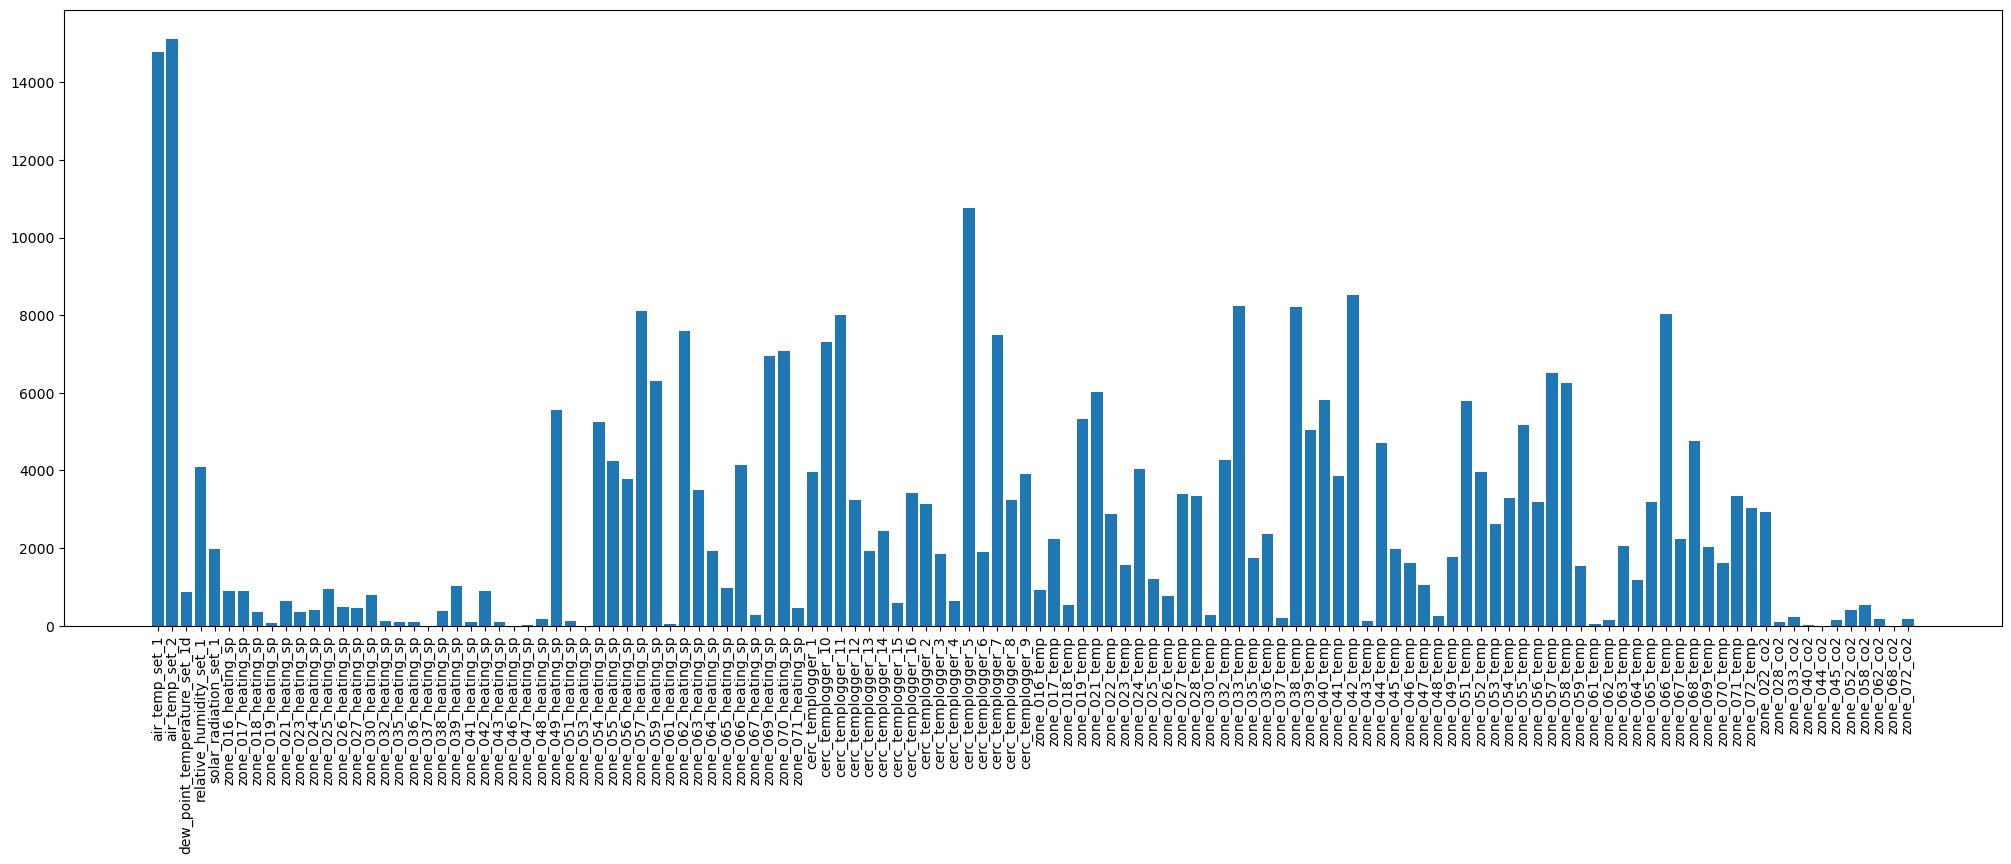

In [291]:
# plot the scores
#plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.figure(figsize=(25, 8))
plt.bar(selected_feature_1.index,selected_feature_1.value)
plt.xticks(selected_feature_1.index, rotation='vertical')
plt.show()

#### Building Basic Linear Model for target hvac_S

In [292]:
# Building Linear Regression model
Ln_model = LinearRegression()

In [293]:
# Training the model
Ln_model.fit(X_train_fs, y_train.hvac_S)

LinearRegression()

In [294]:
# Evaluating the model
ypred_lin = Ln_model.predict(X_test_fs)
# evaluating predictions with MAE
mae = mean_absolute_error(y_test.hvac_S, ypred_lin)
print('MAE: %.3f' % mae)


MAE: 5.458


### 1.b We will be selecting Features using correlation statistics for target variable hvac_N

In [254]:
# feature selection process
X_train_fsN, X_test_fsN, fsN = select_features_corstat(X_train, y_train.hvac_N, X_test)

In [255]:
# Checking the scores for the features
feature_list_hvacN_cor={}
for i in range(len(fsN.scores_)):
    feature_list_hvacN_cor.update({fsN.feature_names_in_[i]: fsN.scores_[i]})
    print('Feature %d: %s : %f' % (i,fsN.feature_names_in_[i], fsN.scores_[i]))


Feature 0: air_temp_set_1 : 323.399355
Feature 1: air_temp_set_2 : 422.881832
Feature 2: dew_point_temperature_set_1d : 175.419263
Feature 3: relative_humidity_set_1 : 33.580283
Feature 4: solar_radiation_set_1 : 506.983791
Feature 5: zone_016_heating_sp : 221.426926
Feature 6: zone_017_heating_sp : 233.078671
Feature 7: zone_018_heating_sp : 975.572440
Feature 8: zone_019_heating_sp : 3443.334314
Feature 9: zone_021_heating_sp : 1019.846179
Feature 10: zone_023_heating_sp : 470.716264
Feature 11: zone_024_heating_sp : 436.299801
Feature 12: zone_025_heating_sp : 246.430326
Feature 13: zone_026_heating_sp : 765.238729
Feature 14: zone_027_heating_sp : 491.455111
Feature 15: zone_030_heating_sp : 65.291631
Feature 16: zone_032_heating_sp : 0.143576
Feature 17: zone_035_heating_sp : 2196.955327
Feature 18: zone_036_heating_sp : 3798.317385
Feature 19: zone_037_heating_sp : 2014.597893
Feature 20: zone_038_heating_sp : 1097.710976
Feature 21: zone_039_heating_sp : 152.530791
Feature 22: z

In [256]:
#creating dataframe from dictionary
selected_feature_N1=pd.DataFrame.from_dict(feature_list_hvacN_cor,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withcorr_score_N=selected_feature_N1.sort_values(by='value',ascending=False)[:40]

In [257]:
top_40_withcorr_score_N.index

Index(['zone_069_heating_sp', 'zone_057_heating_sp', 'cerc_templogger_5',
       'zone_070_heating_sp', 'zone_063_heating_sp', 'zone_061_temp',
       'zone_062_heating_sp', 'zone_059_temp', 'zone_030_temp',
       'zone_066_heating_sp', 'zone_059_heating_sp', 'zone_032_temp',
       'zone_036_heating_sp', 'cerc_templogger_11', 'zone_049_heating_sp',
       'zone_019_heating_sp', 'zone_055_heating_sp', 'zone_062_temp',
       'zone_064_temp', 'zone_064_heating_sp', 'cerc_templogger_7',
       'zone_033_temp', 'zone_071_temp', 'zone_056_heating_sp',
       'zone_037_temp', 'zone_035_heating_sp', 'zone_068_temp',
       'cerc_templogger_3', 'zone_065_heating_sp', 'zone_037_heating_sp',
       'cerc_templogger_13', 'zone_035_temp', 'zone_043_heating_sp',
       'zone_019_temp', 'zone_066_temp', 'zone_048_heating_sp',
       'cerc_templogger_16', 'cerc_templogger_8', 'zone_054_temp',
       'zone_041_heating_sp'],
      dtype='object')

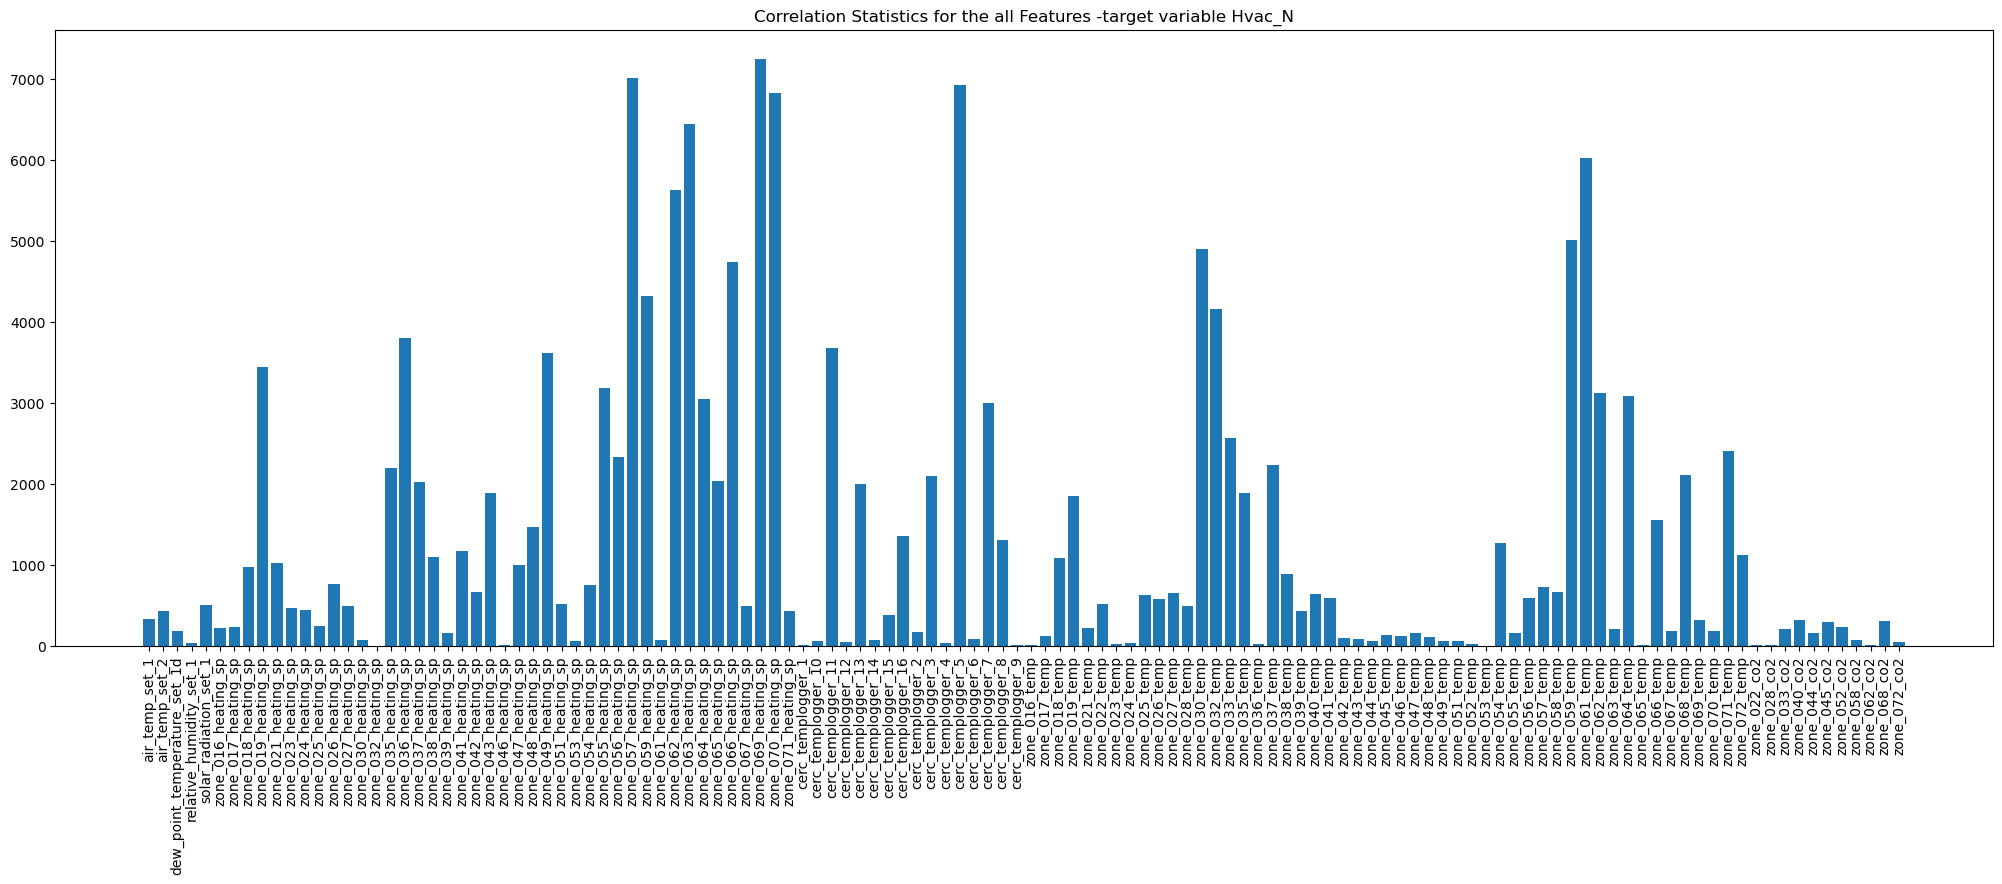

In [258]:
# plot the scores

plt.figure(figsize=(25, 8))
plt.bar(selected_feature_N1.index,selected_feature_N1.value)
plt.xticks(selected_feature_N1.index, rotation='vertical')
plt.title('Correlation Statistics for the all Features -target variable Hvac_N')
plt.show()

### 2.Feature selection and Linear Regression model using Mutual Information statistics


In [259]:
# feature selection
def select_features_mutinfo(X_train, y_train, X_test):
    #Converting y_train into 1-dimensional
    y_train=np.ravel(y_train)
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=88)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


### 2.a Mutual Information statistics - Target Variable hvac_S

In [260]:
# feature selection
X_train_fs, X_test_fs, fs = select_features_mutinfo(X_train, y_train.hvac_S, X_test)

In [261]:

# Checking the scores for the features
feature_list_hvacS_mut={}
for i in range(len(fs.scores_)):
    feature_list_hvacS_mut.update({fs.feature_names_in_[i]: fs.scores_[i]})
    print('Feature %d: %s : %f' % (i,fs.feature_names_in_[i], fs.scores_[i]))


Feature 0: air_temp_set_1 : 0.482675
Feature 1: air_temp_set_2 : 0.503317
Feature 2: dew_point_temperature_set_1d : 0.261926
Feature 3: relative_humidity_set_1 : 0.333524
Feature 4: solar_radiation_set_1 : 0.244428
Feature 5: zone_016_heating_sp : 0.306699
Feature 6: zone_017_heating_sp : 0.292174
Feature 7: zone_018_heating_sp : 0.309382
Feature 8: zone_019_heating_sp : 0.172771
Feature 9: zone_021_heating_sp : 0.239945
Feature 10: zone_023_heating_sp : 0.399586
Feature 11: zone_024_heating_sp : 0.228773
Feature 12: zone_025_heating_sp : 0.394573
Feature 13: zone_026_heating_sp : 0.296882
Feature 14: zone_027_heating_sp : 0.231302
Feature 15: zone_030_heating_sp : 0.412768
Feature 16: zone_032_heating_sp : 0.402639
Feature 17: zone_035_heating_sp : 0.350988
Feature 18: zone_036_heating_sp : 0.315514
Feature 19: zone_037_heating_sp : 0.387256
Feature 20: zone_038_heating_sp : 0.428364
Feature 21: zone_039_heating_sp : 0.367184
Feature 22: zone_041_heating_sp : 0.334480
Feature 23: zone

In [262]:
#creating dataframe from dictionary
selected_feature_2=pd.DataFrame.from_dict(feature_list_hvacS_mut,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withmut_score=selected_feature_2.sort_values(by='value',ascending=False)[:40]

feature_select_df_hvacS_2=all_df.loc[:,top_40_withmut_score.index]
#feature_select_df_hvacS_2.to_csv('feature_select_df_hvacS_2.csv', sep=',', index=False, encoding='utf-8')

In [263]:
top_40_withmut_score.index

Index(['zone_043_heating_sp', 'air_temp_set_2', 'air_temp_set_1',
       'zone_047_heating_sp', 'zone_038_heating_sp', 'zone_061_heating_sp',
       'zone_066_heating_sp', 'zone_070_heating_sp', 'zone_030_heating_sp',
       'zone_049_heating_sp', 'zone_042_heating_sp', 'zone_062_heating_sp',
       'zone_032_heating_sp', 'zone_059_heating_sp', 'zone_065_heating_sp',
       'zone_023_heating_sp', 'zone_025_heating_sp', 'zone_037_heating_sp',
       'zone_056_heating_sp', 'zone_051_heating_sp', 'zone_054_heating_sp',
       'zone_071_heating_sp', 'zone_039_heating_sp', 'cerc_templogger_5',
       'zone_035_heating_sp', 'zone_057_heating_sp', 'zone_063_heating_sp',
       'zone_067_heating_sp', 'zone_055_heating_sp', 'zone_053_heating_sp',
       'zone_064_heating_sp', 'zone_041_heating_sp', 'zone_032_temp',
       'relative_humidity_set_1', 'cerc_templogger_15', 'cerc_templogger_11',
       'zone_021_temp', 'zone_051_temp', 'zone_019_temp',
       'cerc_templogger_10'],
      dtype='obj

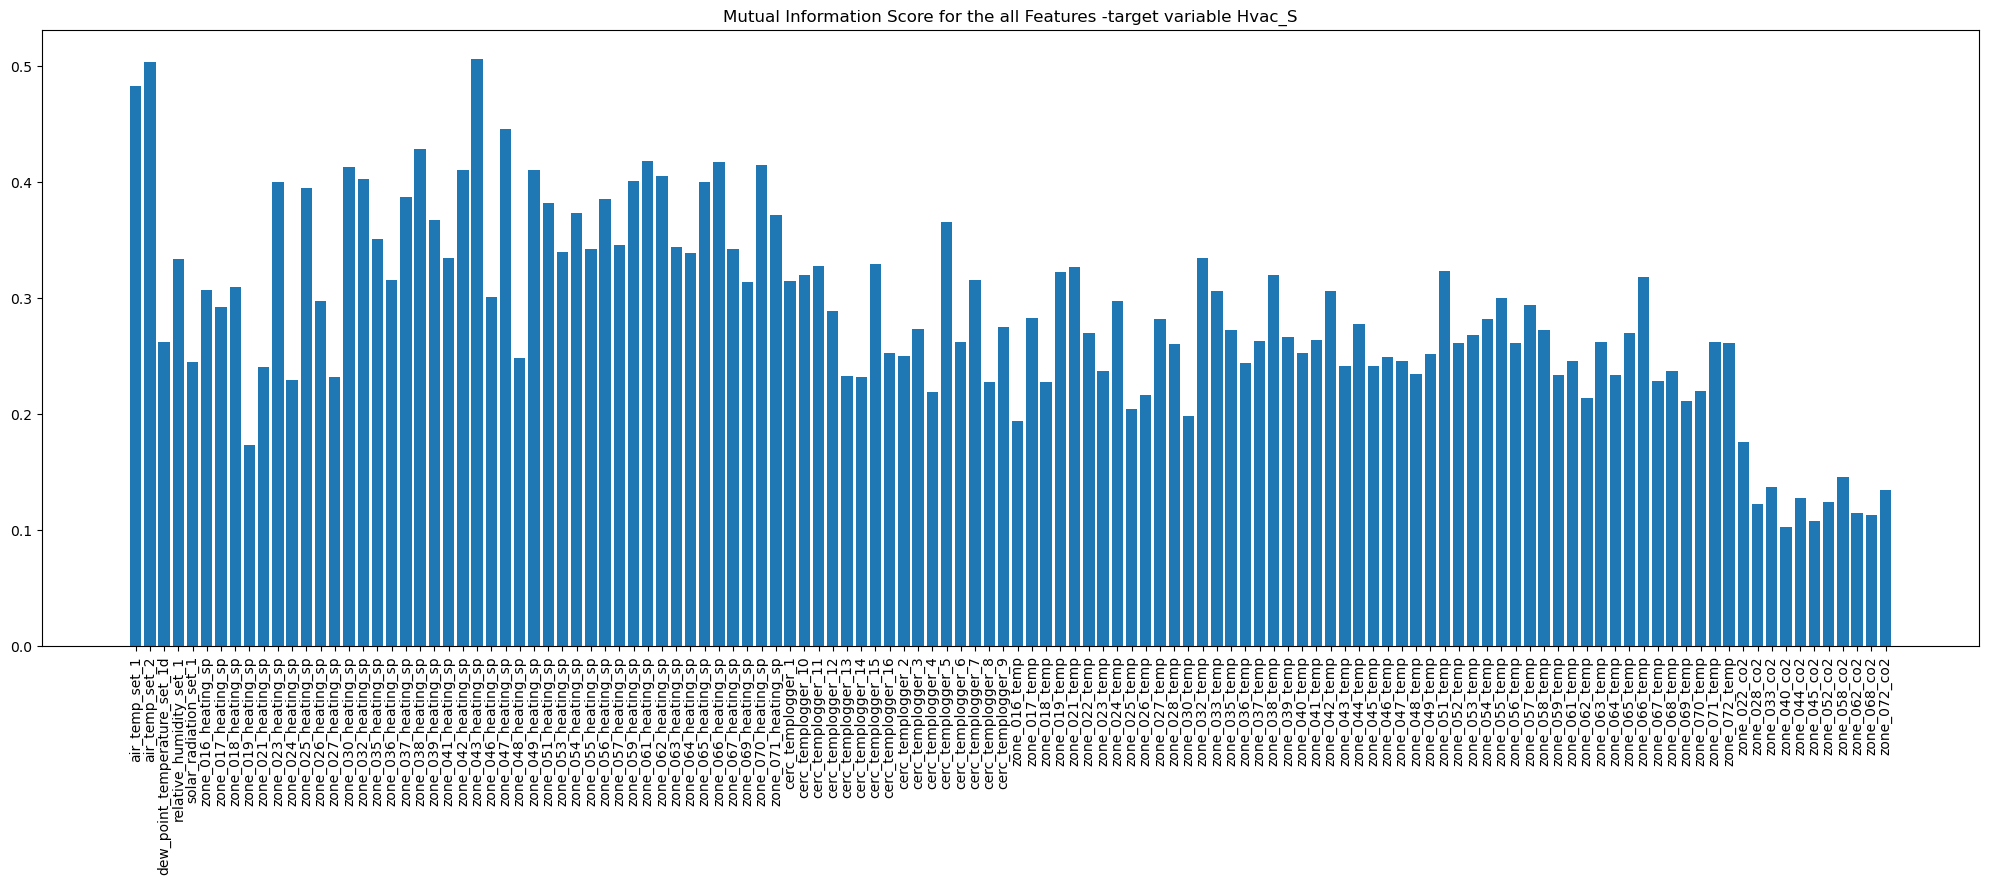

In [264]:
# plot the scores

plt.figure(figsize=(25, 8))
plt.bar(selected_feature_2.index,selected_feature_2.value)
plt.xticks(selected_feature_2.index, rotation='vertical')
plt.title('Mutual Information Score for the all Features -target variable Hvac_S')
plt.show()

#### Building Basic Linear Model

In [265]:
# fiting the model
Ln_model_2 = LinearRegression()
Ln_model_2.fit(X_train_fs, y_train)
# evaluate the model
y_pred_2 = Ln_model_2.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_pred_2, y_pred_2)
print('MAE: %.6f' % mae)

MAE: 0.000000


### 2.b  Mutual Information statistics - Target Variable hvac_N

In [266]:
# feature selection
X_train_fsN, X_test_fsN, fsN = select_features_mutinfo(X_train, y_train.hvac_N, X_test)

In [267]:
# Checking the scores for the features
feature_list_hvacN_mut={}
for i in range(len(fsN.scores_)):
    feature_list_hvacN_mut.update({fsN.feature_names_in_[i]: fsN.scores_[i]})
    print('Feature %d: %s : %f' % (i,fsN.feature_names_in_[i], fsN.scores_[i]))


Feature 0: air_temp_set_1 : 0.339564
Feature 1: air_temp_set_2 : 0.351079
Feature 2: dew_point_temperature_set_1d : 0.255828
Feature 3: relative_humidity_set_1 : 0.280590
Feature 4: solar_radiation_set_1 : 0.255298
Feature 5: zone_016_heating_sp : 0.760115
Feature 6: zone_017_heating_sp : 0.727505
Feature 7: zone_018_heating_sp : 0.508006
Feature 8: zone_019_heating_sp : 0.407017
Feature 9: zone_021_heating_sp : 0.763931
Feature 10: zone_023_heating_sp : 0.753363
Feature 11: zone_024_heating_sp : 0.551551
Feature 12: zone_025_heating_sp : 0.841632
Feature 13: zone_026_heating_sp : 0.620736
Feature 14: zone_027_heating_sp : 0.503280
Feature 15: zone_030_heating_sp : 0.780299
Feature 16: zone_032_heating_sp : 0.815656
Feature 17: zone_035_heating_sp : 0.823425
Feature 18: zone_036_heating_sp : 0.837742
Feature 19: zone_037_heating_sp : 0.783789
Feature 20: zone_038_heating_sp : 0.505801
Feature 21: zone_039_heating_sp : 0.994279
Feature 22: zone_041_heating_sp : 0.642440
Feature 23: zone

In [268]:
#creating dataframe from dictionary
selected_feature_N2=pd.DataFrame.from_dict(feature_list_hvacN_mut,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withmut_score_N=selected_feature_N2.sort_values(by='value',ascending=False)[:40]

In [269]:
top_40_withmut_score_N.index

Index(['zone_071_heating_sp', 'zone_039_heating_sp', 'zone_059_heating_sp',
       'zone_056_heating_sp', 'zone_055_heating_sp', 'zone_070_heating_sp',
       'zone_049_heating_sp', 'zone_051_heating_sp', 'zone_025_heating_sp',
       'zone_065_heating_sp', 'zone_036_heating_sp', 'zone_053_heating_sp',
       'zone_035_heating_sp', 'zone_043_heating_sp', 'zone_032_heating_sp',
       'zone_054_heating_sp', 'zone_066_heating_sp', 'zone_061_heating_sp',
       'zone_037_heating_sp', 'zone_057_heating_sp', 'zone_030_heating_sp',
       'zone_021_heating_sp', 'zone_016_heating_sp', 'zone_023_heating_sp',
       'zone_063_heating_sp', 'zone_062_heating_sp', 'zone_064_heating_sp',
       'zone_017_heating_sp', 'zone_067_heating_sp', 'zone_069_heating_sp',
       'zone_047_heating_sp', 'zone_041_heating_sp', 'zone_026_heating_sp',
       'zone_046_heating_sp', 'zone_024_heating_sp', 'zone_018_heating_sp',
       'zone_038_heating_sp', 'zone_027_heating_sp', 'cerc_templogger_7',
       'zone_0

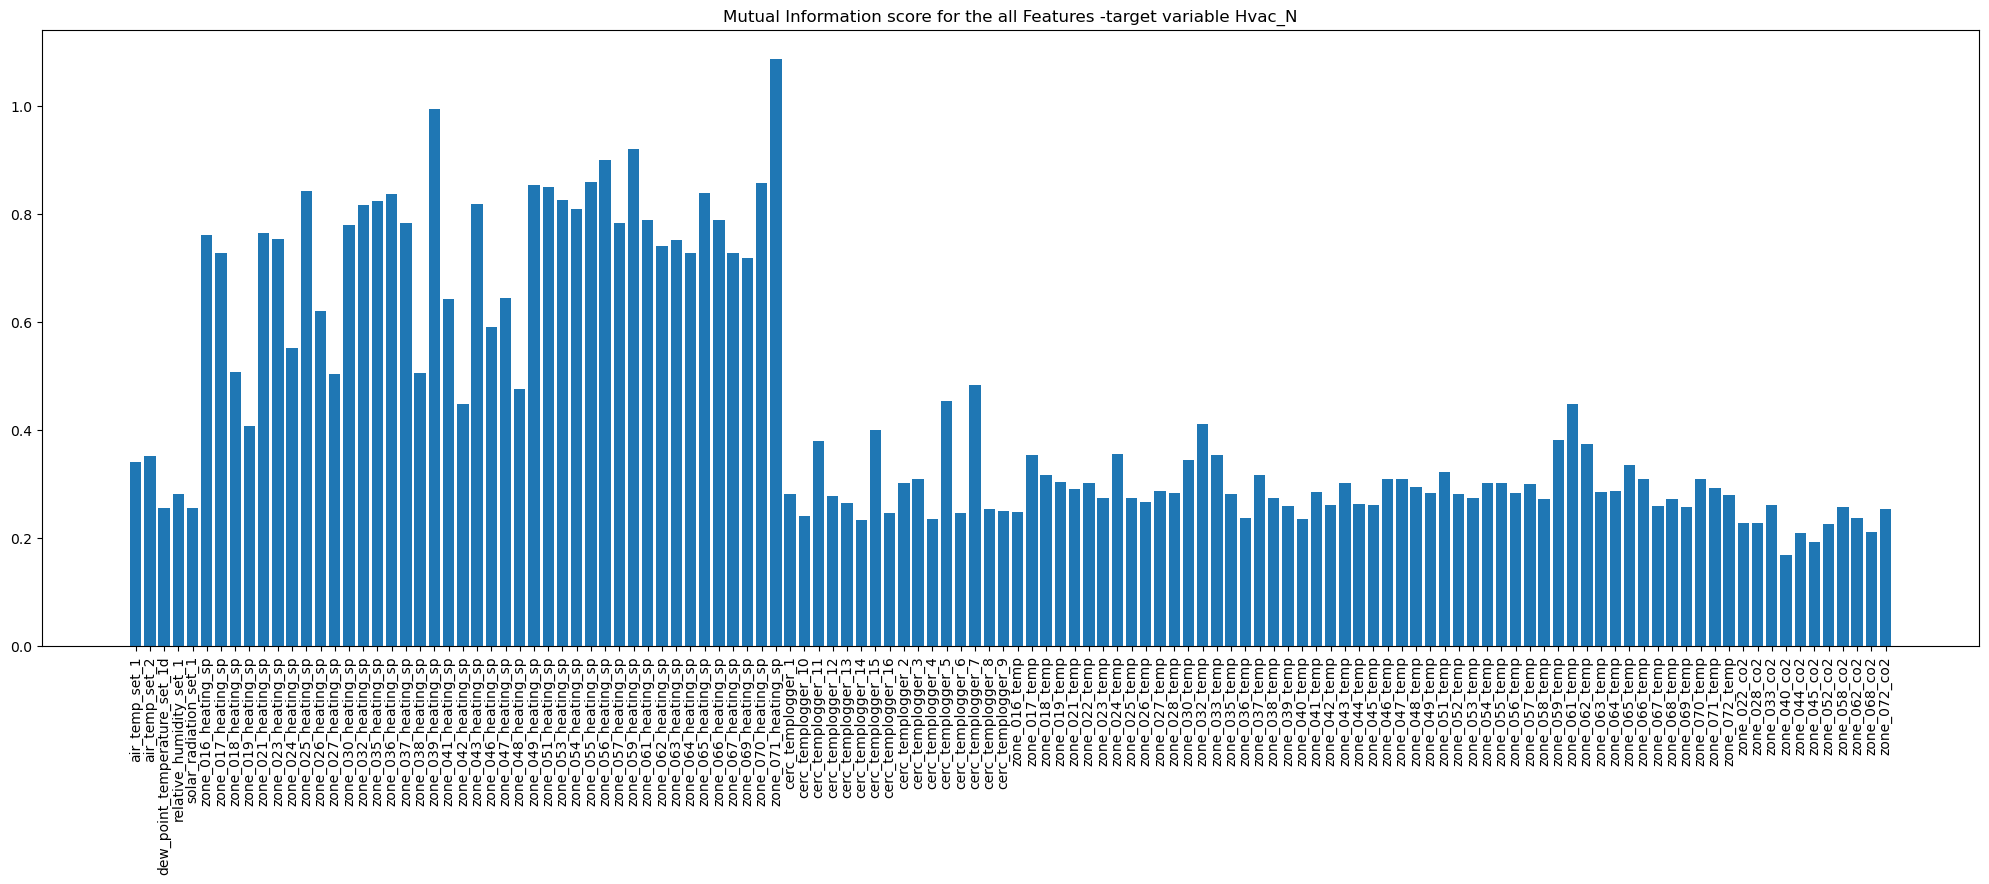

In [270]:
# plot the scores

plt.figure(figsize=(25, 8))
plt.bar(selected_feature_N2.index,selected_feature_N2.value)
plt.xticks(selected_feature_N2.index, rotation='vertical')
plt.title('Mutual Information score for the all Features -target variable Hvac_N')
plt.show()

# Building Models

## Multiple Linear Regression

### With Feature selected with correlation statistics 
-  We will be building models with selected features from correlation statistics and taget variables- hvac_S and hvac_N
-  And we will select selective feature from feature dataset

In [459]:
#Selected features through Cooreleation Statistics for target Hvac_S : top_40_withcorr_score_S.index
feature_corr=feature.loc[:,top_40_withcorr_score_S.index]

In [460]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature_corr,target, random_state=42, test_size=0.3)

### Function to evaluate model evaluation metrics for linear regression

In [461]:
## Function to evaluate the regression models
def evaluate_regression_model(y_test,y_pred):
    print('R2 score: {}'.format(r2_score(y_test,y_pred)))
    print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, y_pred)))
    print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, y_pred)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error (RMSE): {}'.format(rmse))
    print('Mean Absolute Percentage Error (MAPE): {}'.format(mean_absolute_percentage_error(y_test, y_pred)))
    

### Multiple Linear Regression with Feature Standardization 

In [462]:
#Creating Polynomial feature and then performing linear regression with Robust Scalar transformaton
steps = [
    ('scalar', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test,y_test)))

Training score: 0.8952930203375613
Test score: 0.8501159295067173


In [463]:
#Predicting the target variables
pred_cor_y=pipeline.predict(X_test)

#### Model Evaluation

In [464]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y)

R2 score: 0.8501159295067173
Mean Absolute Error (MAE): 3.089576553031238
Mean Squared Error (MSE): 26.482597293222106
Root Mean Squared Error (RMSE): 5.146124492588778
Mean Absolute Percentage Error (MAPE): 1829002459392436.5


### Multiple Linear Regression with Feature Standardization and Ridge Regularization

In [372]:
#Creating Polynomial feature and then performing linear regression with Standard Scalar and Ridge Regularization
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', Ridge(alpha=3, fit_intercept=True))
]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training score: {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test score: {}'.format(ridge_pipeline.score(X_test,y_test)))

Training score: 0.8661558712863507
Test score: 0.8168044880875331


In [373]:
#Predicting the target variables
pred_cor_y_ridge=ridge_pipeline.predict(X_test)

#### Model Evaluation

In [374]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y_ridge)

R2 score: 0.8168044880875331
Mean Absolute Error (MAE): 3.6421048425907405
Mean Squared Error (MSE): 32.48744196099304
Root Mean Squared Error (RMSE): 5.699775606196532
Mean Absolute Percentage Error (MAPE): 2294443588284382.0


### Multiple Linear Regression with Feature Standardization and Lasso Regularization

In [375]:
steps = [
    ('scalar', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=.5, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test,y_test)))

Training score: 0.5936254205638205
Test score: 0.578958169036567


In [376]:
#Predicting the target variables
pred_cor_y_lasso=lasso_pipe.predict(X_test)

#### Model Evaluation

In [377]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y_lasso)

R2 score: 0.578958169036567
Mean Absolute Error (MAE): 6.313882614779906
Mean Squared Error (MSE): 75.68140301098467
Root Mean Squared Error (RMSE): 8.699505906141145
Mean Absolute Percentage Error (MAPE): 5620615006495194.0


### Feature selected with Correlation Statistics for target variable hvac_N

In [533]:
#Selected features through Cooreleation Statistics for target Hvac_N : top_40_withcorr_score_N.index
feature_corr_N=feature.loc[:,top_40_withcorr_score_N.index]

In [466]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature_corr_N,target, random_state=42, test_size=0.3)

### Multiple Linear Regression with Feature Standardization 

In [467]:
#Creating Polynomial feature and then performing linear regression with Robust Scalar transformaton
steps = [
    ('scalar', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test,y_test)))

Training score: 0.8939144202116489
Test score: -401.74126337734054


In [468]:
#Predicting the target variables
pred_cor_y=pipeline.predict(X_test)

#### Model Evaluation

In [469]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y)

R2 score: -401.74126337734054
Mean Absolute Error (MAE): 9.265915405668949
Mean Squared Error (MSE): 68818.3660108692
Root Mean Squared Error (RMSE): 262.3325485159423
Mean Absolute Percentage Error (MAPE): 7237320113093052.0


### Multiple Linear Regression with Feature Standardization and Ridge Regularization

In [470]:
#Creating Polynomial feature and then performing linear regression with Standard Scalar and Ridge Regularization
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', Ridge(alpha=3, fit_intercept=True))
]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training score: {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test score: {}'.format(ridge_pipeline.score(X_test,y_test)))

Training score: 0.8773152113735168
Test score: 0.7992062578880962


In [471]:
#Predicting the target variables
pred_cor_y_ridge=ridge_pipeline.predict(X_test)

#### Model Evaluation

In [473]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y_ridge)

R2 score: 0.7992062578880962
Mean Absolute Error (MAE): 3.4264602083171094
Mean Squared Error (MSE): 35.84614213868947
Root Mean Squared Error (RMSE): 5.987164782991151
Mean Absolute Percentage Error (MAPE): 1897964224452814.0


### Multiple Linear Regression with Feature Standardization and Lasso Regularization

In [474]:
steps = [
    ('scalar', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=.5, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test,y_test)))

Training score: 0.6069237989025538
Test score: 0.5896233878184796


In [475]:
#Predicting the target variables
pred_cor_y_lasso=lasso_pipe.predict(X_test)

#### Model Evaluation 

In [477]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y_lasso)

R2 score: 0.5896233878184796
Mean Absolute Error (MAE): 6.182010373608614
Mean Squared Error (MSE): 73.63789241340957
Root Mean Squared Error (RMSE): 8.581252380242034
Mean Absolute Percentage Error (MAPE): 5075082710385264.0


### With Feature selected with Mutual Information statistics 
-  We will be building models with selected features from mutual information statistics and taget variables- hvac_S and hvac_N
-  And we will select selective feature from feature dataset

In [545]:
#Selected features through Mutual Information Statistics for target Hvac_S : top_40_withmut_score.index

feature_mut=feature.loc[:,top_40_withmut_score.index]

In [379]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature_mut,target, random_state=42, test_size=0.3)

### Multiple Linear Regression with Feature Standardization 

In [392]:
#Creating Polynomial feature and then performing linear regression with Robust Scalar transformaton
steps = [
    ('scalar', StandardScaler()),
 #   ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test,y_test)))

Training score: 0.5698809592692851
Test score: 0.5578883814297477


In [393]:
#Predicting the target variables
pred_mut_y=pipeline.predict(X_test)

### Model Evaluation

In [394]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y)

R2 score: 0.5578883814297477
Mean Absolute Error (MAE): 6.593952134088467
Mean Squared Error (MSE): 79.71107966607475
Root Mean Squared Error (RMSE): 8.92810616346349
Mean Absolute Percentage Error (MAPE): 4886003320165775.0


### Multiple Linear Regression with Feature Standardization and Ridge Regularization

In [441]:
#Creating Polynomial feature and then performing linear regression with Standard Scalar and Ridge Regularization
steps = [
    ('scalar', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', Ridge(alpha=100, fit_intercept=True))
]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training score: {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test score: {}'.format(ridge_pipeline.score(X_test,y_test)))

Training score: 0.814872262137899
Test score: 0.7807587807191707


In [442]:
#Predicting the target variables
pred_mut_y_ridge=ridge_pipeline.predict(X_test)

### Model Evaluation

In [443]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y_ridge)

R2 score: 0.7807587807191707
Mean Absolute Error (MAE): 4.167745025277836
Mean Squared Error (MSE): 38.8288466271078
Root Mean Squared Error (RMSE): 6.2312796941806265
Mean Absolute Percentage Error (MAPE): 3095888483170930.0


### Multiple Linear Regression with Feature Standardization and Lasso Regularization

In [456]:
steps = [
    ('scalar', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=.1, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test,y_test)))

D:\MSDA_SJSU\Application dwnload\Anaconda_3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.914e+04, tolerance: 6.193e+02
  model = cd_fast.enet_coordinate_descent(
D:\MSDA_SJSU\Application dwnload\Anaconda_3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e+04, tolerance: 6.930e+02
  model = cd_fast.enet_coordinate_descent(


Training score: 0.6660072440345748
Test score: 0.652401844548103


In [457]:
#Predicting the target variables
pred_mut_y_lasso=lasso_pipe.predict(X_test)

### Model Evaluation

In [458]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y_lasso)

R2 score: 0.652401844548103
Mean Absolute Error (MAE): 5.634524064394981
Mean Squared Error (MSE): 62.37187316829551
Root Mean Squared Error (RMSE): 7.897586540728471
Mean Absolute Percentage Error (MAPE): 4519022707532121.0


### Selected features through Mutual  Information Statistics for target Hvac_N : top_40_withmut_score_N

In [544]:
#Selected features through Mutual Information Statistics for target Hvac_N : top_40_withmut_score_N.index

feature_mut_N=feature.loc[:,top_40_withmut_score_N.index]

In [479]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature_mut_N,target, random_state=42, test_size=0.3)

### Multiple Linear Regression with Feature Standardization 

In [484]:
#Creating Polynomial feature and then performing linear regression with Robust Scalar transformaton
steps = [
    ('scalar', StandardScaler()),
  #  ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test,y_test)))

Training score: 0.42268158292797264
Test score: 0.4207831068951758


In [485]:
#Predicting the target variables
pred_mut_y=pipeline.predict(X_test)

### Model Evaluation

In [486]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y)

R2 score: 0.4207831068951758
Mean Absolute Error (MAE): 7.477908296910261
Mean Squared Error (MSE): 103.71438674227964
Root Mean Squared Error (RMSE): 10.184026057619826
Mean Absolute Percentage Error (MAPE): 5808870049073587.0


### Multiple Linear Regression with Feature Standardization and Ridge Regularization

In [500]:
#Creating Polynomial feature and then performing linear regression with Standard Scalar and Ridge Regularization
steps = [
    ('scalar', RobustScaler()),
 #   ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', Ridge(alpha=0.06, fit_intercept=True))
]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training score: {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test score: {}'.format(ridge_pipeline.score(X_test,y_test)))

Training score: 0.422681096972595
Test score: 0.42075683446315215


In [501]:
#Predicting the target variables
pred_mut_y_ridge=ridge_pipeline.predict(X_test)

### Model Evaluation

In [502]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y_ridge)

R2 score: 0.42075683446315215
Mean Absolute Error (MAE): 7.478102297615337
Mean Squared Error (MSE): 103.71927886184824
Root Mean Squared Error (RMSE): 10.184266240718976
Mean Absolute Percentage Error (MAPE): 5809826647962859.0


### Multiple Linear Regression with Feature Standardization and Lasso Regularization

In [509]:
steps = [
    ('scalar', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=100, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test,y_test)))

Training score: 1.0880185641326534e-14
Test score: -5.1728933457173554e-05


In [510]:
#Predicting the target variables
pred_mut_y_lasso=lasso_pipe.predict(X_test)

### Model Evaluation

In [508]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y_lasso)

R2 score: 0.3694323514285832
Mean Absolute Error (MAE): 7.661455538317705
Mean Squared Error (MSE): 112.57479318016388
Root Mean Squared Error (RMSE): 10.610126916308017
Mean Absolute Percentage Error (MAPE): 6940125735754238.0


### Model Evaluation Summary

## XGBoost for Regression 

### With Feature selected with correlation statistics 
-  We will be building models with selected features from correlation statistics and taget variables- hvac_S and hvac_N
-  And we will select selective feature from feature dataset

#### Reference
- https://medium.com/@okanyenigun/cross-validation-techniques-for-machine-learning-a-guide-to-improve-model-performance-8748d46281cc
- https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

#### Selected features through Cooreleation Statistics for target Hvac_S : top_40_withcorr_score_S

In [534]:
#Selected features through Cooreleation Statistics for target Hvac_S : top_40_withcorr_score_S.index
feature_corr_S=feature.loc[:,top_40_withcorr_score_S.index]

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature_corr_S,target.hvac_S, random_state=42, test_size=0.3)

In [535]:
# Building the model
xgb_corrS = XGBRegressor(objective='reg:squarederror')

In [532]:
# Setting up hyperparameter grid
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.3]}

# k-fold cross validation using GridSearch
kf = KFold(n_splits=5)
grid_search_corrS = GridSearchCV(xgb_corrS, param_grid, cv=kf)
grid_search_corrS.fit(X_train, y_train)
print('Best Parameters : ', grid_search_corrS.best_params_)
print('Best Score : ', grid_search_corrS.best_score_)

Best Parameters :  {'learning_rate': 0.2, 'max_depth': 7}
Best Score :  0.8965185326256071


In [528]:
#Predicting the target variables
pred_corrS=grid_search_corrS.predict(X_test)

### Model Evaluation

In [529]:
#Model Evaluation
evaluate_regression_model(y_test,pred_corrS)

R2 score: 0.8991856067233458
Mean Absolute Error (MAE): 2.8099760320157823
Mean Squared Error (MSE): 17.145611136521637
Root Mean Squared Error (RMSE): 4.140725919029372
Mean Absolute Percentage Error (MAPE): 2133571294083593.8


#### Selected features through Coorelation Statistics for target Hvac_N : top_40_withcorr_score_N

In [536]:
#Selected features through Cooreleation Statistics for target Hvac_N : top_40_withcorr_score_N.index
feature_corr_N=feature.loc[:,top_40_withcorr_score_N.index]

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature_corr_N,target.hvac_N, random_state=42, test_size=0.3)

In [537]:
# Building the model
xgb_corrN = XGBRegressor(objective='reg:squarederror')

In [541]:
# Setting up hyperparameter grid
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.3]}

# k-fold cross validation using GridSearch
kf = KFold(n_splits=8)
grid_search_corrN = GridSearchCV(xgb_corrN, param_grid, cv=kf)
grid_search_corrN.fit(X_train, y_train)
print('Best Parameters : ', grid_search_corrN.best_params_)
print('Best Score : ', grid_search_corrN.best_score_)

Best Parameters :  {'learning_rate': 0.2, 'max_depth': 7}
Best Score :  0.9410504138090806


In [542]:
#Predicting the target variables
pred_corrN=grid_search_corrN.predict(X_test)

### Model Evaluation

In [543]:
#Model Evaluation
evaluate_regression_model(y_test,pred_corrN)

R2 score: 0.9388138758144817
Mean Absolute Error (MAE): 1.9512297155677156
Mean Squared Error (MSE): 11.690536230242333
Root Mean Squared Error (RMSE): 3.4191426162478704
Mean Absolute Percentage Error (MAPE): 530514727528147.75


### With Feature selected with Mutual Information statistics 
-  We will be building models with selected features from Mutual Information statistics and taget variables- hvac_S and hvac_N
-  And we will select selective feature from feature dataset

#### Selected features through Mutual Information Statistics for target Hvac_S : top_40_withmut_score

In [547]:
#Selected features through Mutual Information Statistics for target Hvac_S : top_40_withmut_score.index

feature_mut_S=feature.loc[:,top_40_withmut_score.index]

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature_mut_S,target.hvac_S, random_state=42, test_size=0.3)

In [548]:
# Building the model
xgb_mutS = XGBRegressor(objective='reg:squarederror')

In [553]:
# Setting up hyperparameter grid
param_grid = {'max_depth': [3, 5, 7, 9 , 10], 'learning_rate': [0.1, 0.2, 0.3,0.4]}

# k-fold cross validation using GridSearch
kf = KFold(n_splits=8)
grid_search_mutS = GridSearchCV(xgb_mutS, param_grid, cv=kf)
grid_search_mutS.fit(X_train, y_train)
print('Best Parameters : ', grid_search_mutS.best_params_)
print('Best Score : ', grid_search_mutS.best_score_)

Best Parameters :  {'learning_rate': 0.2, 'max_depth': 10}
Best Score :  0.9078710074122223


In [554]:
#Predicting the target variables
pred_mutS=grid_search_mutS.predict(X_test)

### Model Evaluation

In [555]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mutS)

R2 score: 0.9077672690271347
Mean Absolute Error (MAE): 2.5022992829995774
Mean Squared Error (MSE): 15.68611869716395
Root Mean Squared Error (RMSE): 3.9605705014762647
Mean Absolute Percentage Error (MAPE): 1759060328464073.0


#### Selected features through Mutual Information Statistics for target Hvac_N : top_40_withmut_score_N

In [576]:
#Selected features through Mutual Information Statistics for target Hvac_N : top_40_withmut_score_N.index

feature_mut_N=feature.loc[:,top_40_withmut_score_N.index]

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature_mut_N,target.hvac_N, random_state=42, test_size=0.3)

In [577]:
# Building the model
xgb_mutN = XGBRegressor(objective='reg:squarederror')

In [578]:
# Setting up hyperparameter grid
param_grid = {'max_depth': [ 7, 9 , 10, 12], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# k-fold cross validation using GridSearch
kf = KFold(n_splits=8)
grid_search_mutN = GridSearchCV(xgb_mutN, param_grid, cv=kf)
grid_search_mutN.fit(X_train, y_train)
print('Best Parameters : ', grid_search_mutN.best_params_)
print('Best Score : ', grid_search_mutN.best_score_)

Best Parameters :  {'learning_rate': 0.05, 'max_depth': 10}
Best Score :  0.8539991454951552


In [579]:
#Predicting the target variables
pred_mutN=grid_search_mutN.predict(X_test)

### Model Evaluation

In [580]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mutN)

R2 score: 0.8492345864067009
Mean Absolute Error (MAE): 2.967717775585549
Mean Squared Error (MSE): 28.8060169416172
Root Mean Squared Error (RMSE): 5.3671237121587945
Mean Absolute Percentage Error (MAPE): 1299734296800992.2
